In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22607


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22602,2021-05-06,47,沖縄県,39,12817,0,137
22603,2021-05-07,47,沖縄県,82,12899,1,138
22604,2021-05-08,47,沖縄県,93,12992,0,138
22605,2021-05-09,47,沖縄県,103,13095,0,138
22606,2021-05-10,47,沖縄県,36,13131,1,139


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10582,6889,127
43,香川県,17797,1592,23
44,高知県,18759,1123,20
45,鳥取県,14911,403,2
46,鹿児島県,22126,2597,28


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
22600,2021-05-04,47,沖縄県,33,12715,0,137,450.0
22601,2021-05-05,47,沖縄県,63,12778,0,137,450.0
22602,2021-05-06,47,沖縄県,39,12817,0,137,413.0
22603,2021-05-07,47,沖縄県,82,12899,1,138,436.0
22604,2021-05-08,47,沖縄県,93,12992,0,138,424.0
22605,2021-05-09,47,沖縄県,103,13095,0,138,470.0
22606,2021-05-10,47,沖縄県,36,13131,1,139,449.0


In [5]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数"]]
latest.head()

,都道府県名,直近1週間の感染者数
480,北海道,2300.0
961,青森県,181.0
1442,岩手県,116.0
1923,宮城県,210.0
2404,秋田県,95.0


In [6]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数
0,三重県,11544,4171,91,272.0
1,京都府,12506,13813,194,857.0
2,佐賀県,19721,1996,14,319.0
3,兵庫県,13468,35553,797,2637.0
4,北海道,481,27090,901,2300.0


## 人口データを付与

In [7]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [8]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口
0,三重県,11544,4171,91,272.0,1813859
1,京都府,12506,13813,194,857.0,2545899
2,佐賀県,19721,1996,14,319.0,823810
3,兵庫県,13468,35553,797,2637.0,5549568
4,北海道,481,27090,901,2300.0,5267762


## 人口当たりの感染者数

In [9]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,481,27090,901,2300.0,5267762,51.426014,514.260136,43.661806
41,青森県,962,1813,26,181.0,1275783,14.210881,142.108807,14.187366
19,岩手県,1443,1104,36,116.0,1235517,8.935531,89.355306,9.388782
11,宮城県,1924,8353,74,210.0,2292385,36.438033,364.380329,9.160765
36,秋田県,2405,601,9,95.0,985416,6.098947,60.989470,9.640598
15,山形県,2886,1608,36,70.0,1082296,14.857303,148.573034,6.467732
35,福島県,3367,3928,129,415.0,1881981,20.871624,208.716241,22.051232
38,茨城県,3848,8607,135,290.0,2921436,29.461539,294.615388,9.926625
27,栃木県,4329,5628,72,208.0,1965516,28.633702,286.337023,10.582463
37,群馬県,4810,6768,107,532.0,1969439,34.365116,343.651162,27.012769


## 感染者数

### 平均値、中央値

In [10]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      13695.617021
std       26375.350437
min         379.000000
25%        1904.500000
50%        4129.000000
75%        8480.000000
max      147167.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [11]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6253,147167,1920,5454.0,13834925,106.373544,1063.735438,39.421970
1,大阪府,12987,90213,1730,5867.0,8849635,101.939798,1019.397975,66.296520
2,神奈川県,6734,55975,841,1697.0,9209442,60.780013,607.800125,18.426741
3,埼玉県,5291,40008,752,1486.0,7390054,54.137629,541.376288,20.108107
4,愛知県,11063,37176,656,2647.0,7575530,49.073794,490.737942,34.941450
5,兵庫県,13468,35553,797,2637.0,5549568,64.064446,640.644461,47.517212
6,千葉県,5772,34559,642,940.0,6319772,54.683935,546.839348,14.873954
7,福岡県,19240,27204,373,2726.0,5129841,53.030883,530.308834,53.140049
8,北海道,481,27090,901,2300.0,5267762,51.426014,514.260136,43.661806
9,京都府,12506,13813,194,857.0,2545899,54.255884,542.558837,33.661980


## １万人あたりの感染者数

### 平均値、中央値

In [12]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      31.761730
std       23.558711
min        5.579076
25%       16.034948
50%       24.228888
75%       42.755914
max      106.373544
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [13]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
9,大阪府,12987,90213,1730,5867.0,8849635,101.939798,1019.397975,66.296520
34,福岡県,19240,27204,373,2726.0,5129841,53.030883,530.308834,53.140049
3,兵庫県,13468,35553,797,2637.0,5549568,64.064446,640.644461,47.517212
18,岡山県,15873,5124,61,879.0,1903627,26.917038,269.170378,46.175012
4,北海道,481,27090,901,2300.0,5267762,51.426014,514.260136,43.661806
10,奈良県,13949,6881,88,551.0,1353837,50.825912,508.259118,40.699139
8,大分県,21164,2466,28,463.0,1151229,21.420586,214.205862,40.217889
26,東京都,6253,147167,1920,5454.0,13834925,106.373544,1063.735438,39.421970
2,佐賀県,19721,1996,14,319.0,823810,24.228888,242.288877,38.722521
24,愛知県,11063,37176,656,2647.0,7575530,49.073794,490.737942,34.941450


## グラフ化

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [15]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


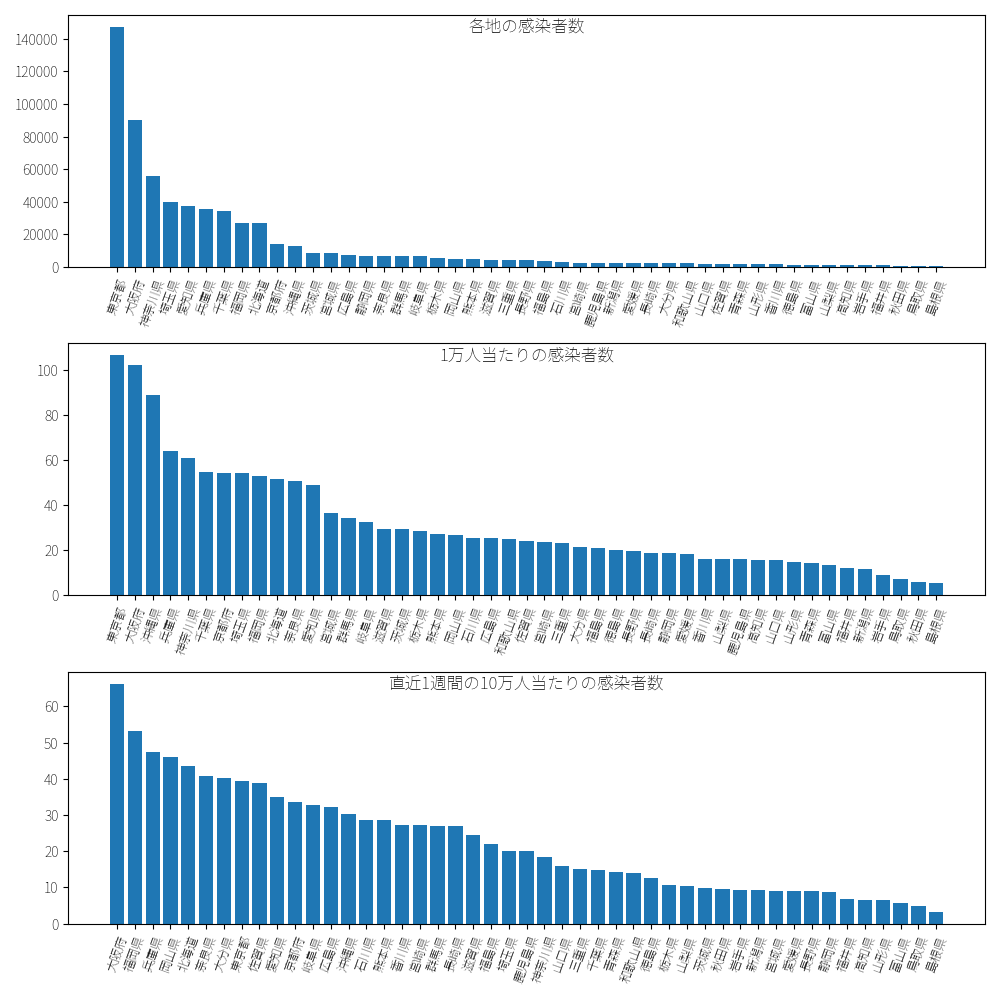

In [16]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(3,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(3,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの感染者数",y=0.9)

fig.tight_layout()


## 度数分布表

In [17]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   379.   18727.5  37076.   55424.5  73773.   92121.5 110470.  128818.5
 147167. ]


## ヒストグラム

<IPython.core.display.Javascript object>


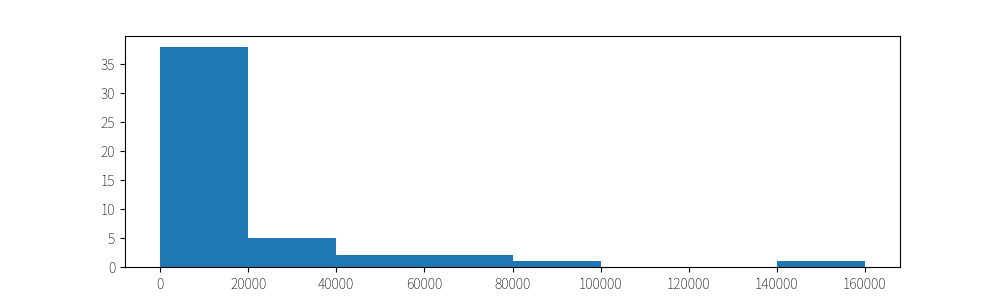

(array([38.,  5.,  2.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [18]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


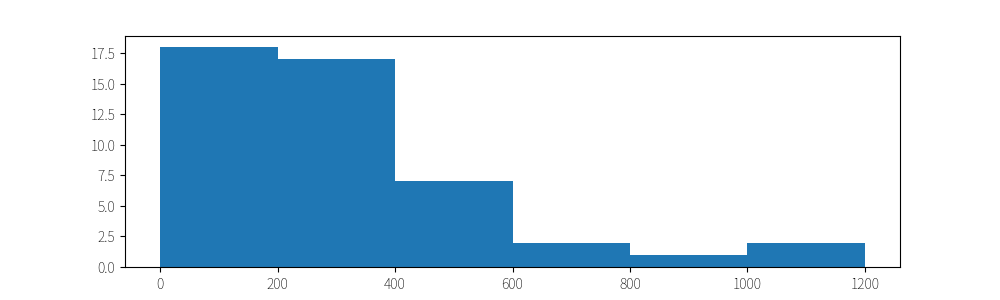

(array([18., 17.,  7.,  2.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [19]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
